In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [9]:
df = pd.read_csv("zurich_enriched_taxonomy.csv")
df.head()

,name,rating,minimum_clean,description_clean,primary_cuisine_group
0,mit&ohne kebab - HB,4.0,15.0,kebab,middle_eastern
1,Black Tap Craft Burgers & Beer Zurich,4.3,18.0,"amerikanisch, burger",american
2,Bierhalle Wolf,4.1,18.0,"snacks, getränke snacks",other
3,MrBeast Burger© Zürich,3.3,30.0,"snacks, amerikanisch",american
4,Starbucks Limmatstrasse,3.8,0.0,"frühstück, kaffee",other


In [10]:
os.makedirs("outputs/figures", exist_ok=True)


In [11]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   name                   195 non-null    object 
 1   rating                 195 non-null    float64
 2   minimum_clean          195 non-null    float64
 3   description_clean      195 non-null    object 
 4   primary_cuisine_group  195 non-null    object 
dtypes: float64(2), object(3)
memory usage: 7.7+ KB


,rating,minimum_clean
count,195.000000,195.000000
mean,4.264615,29.333333
std,0.497032,22.884665
min,1.700000,0.000000
25%,4.000000,20.000000
50%,4.300000,20.000000
75%,4.600000,30.000000
max,5.000000,150.000000


In [12]:
summary = (
    df.groupby("primary_cuisine_group")
      .agg(
          count_restaurants=("name", "count"),
          avg_rating=("rating", "mean"),
          avg_minimum=("minimum_clean", "mean"),
      )
      .sort_values("count_restaurants", ascending=False)
)

summary


,count_restaurants,avg_rating,avg_minimum
primary_cuisine_group,,,
asian,59,4.377966,31.711864
american,43,3.990698,24.604651
european,32,4.396875,29.156250
middle_eastern,32,4.200000,26.937500
other,12,4.250000,59.500000
grocery_retail,10,4.380000,14.200000
african,6,4.616667,20.000000
latin,1,4.100000,20.000000


In [13]:
summary.round(2)

,count_restaurants,avg_rating,avg_minimum
primary_cuisine_group,,,
asian,59,4.38,31.71
american,43,3.99,24.60
european,32,4.40,29.16
middle_eastern,32,4.20,26.94
other,12,4.25,59.50
grocery_retail,10,4.38,14.20
african,6,4.62,20.00
latin,1,4.10,20.00


In [14]:
sns.set_theme(style="whitegrid")

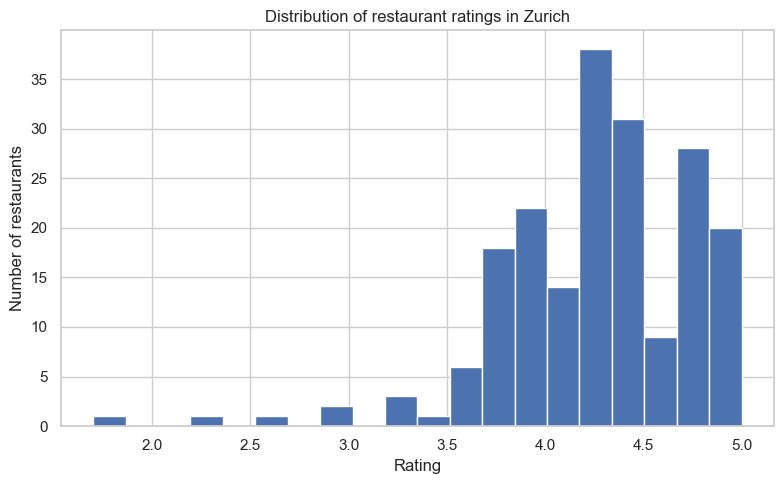

In [15]:
plt.figure(figsize=(8, 5))
plt.hist(df["rating"], bins=20)
plt.xlabel("Rating")
plt.ylabel("Number of restaurants")
plt.title("Distribution of restaurant ratings in Zurich")
plt.tight_layout()

plt.savefig("outputs/figures/hist_rating.png")
plt.show()


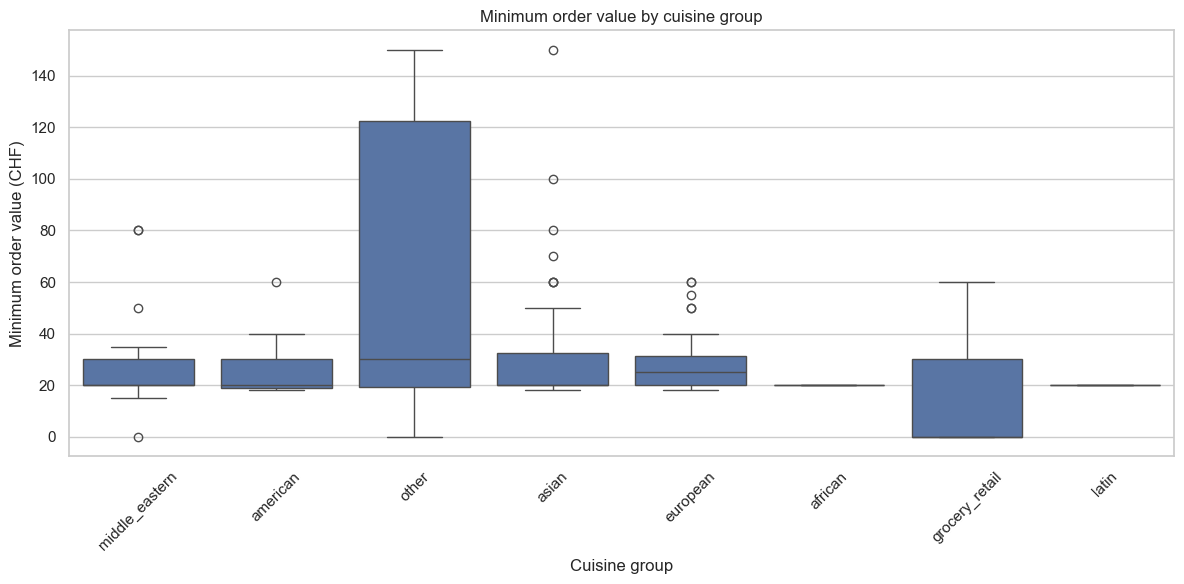

In [16]:
plt.figure(figsize=(12, 6))
sns.boxplot(
    data=df,
    x="primary_cuisine_group",
    y="minimum_clean"
)

plt.xticks(rotation=45)
plt.xlabel("Cuisine group")
plt.ylabel("Minimum order value (CHF)")
plt.title("Minimum order value by cuisine group")
plt.tight_layout()

plt.savefig("outputs/figures/box_minimum_by_cuisine.png")
plt.show()


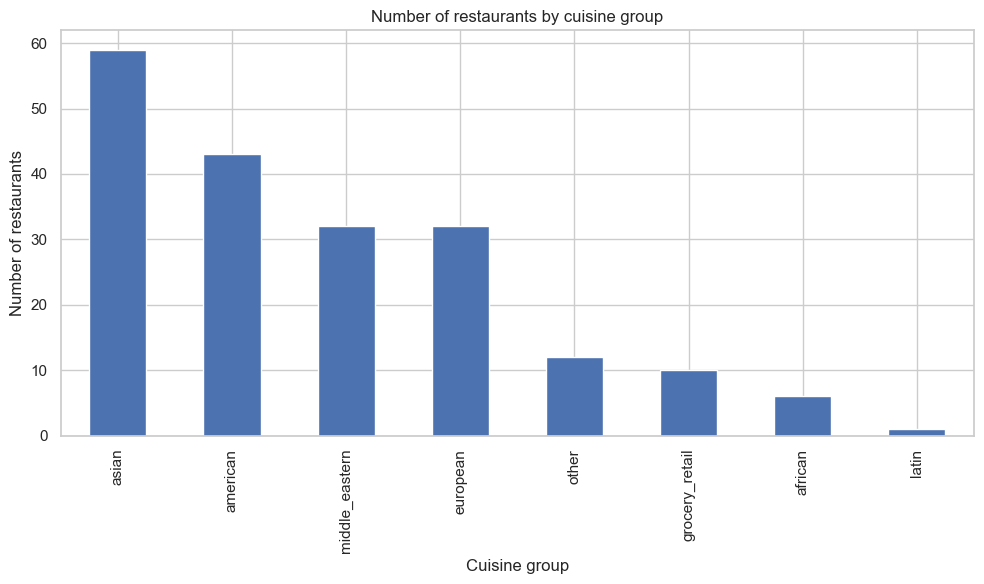

In [17]:
plt.figure(figsize=(10, 6))

df["primary_cuisine_group"].value_counts().plot(kind="bar")

plt.xlabel("Cuisine group")
plt.ylabel("Number of restaurants")
plt.title("Number of restaurants by cuisine group")
plt.tight_layout()

plt.savefig("outputs/figures/bar_restaurants_by_cuisine.png")
plt.show()


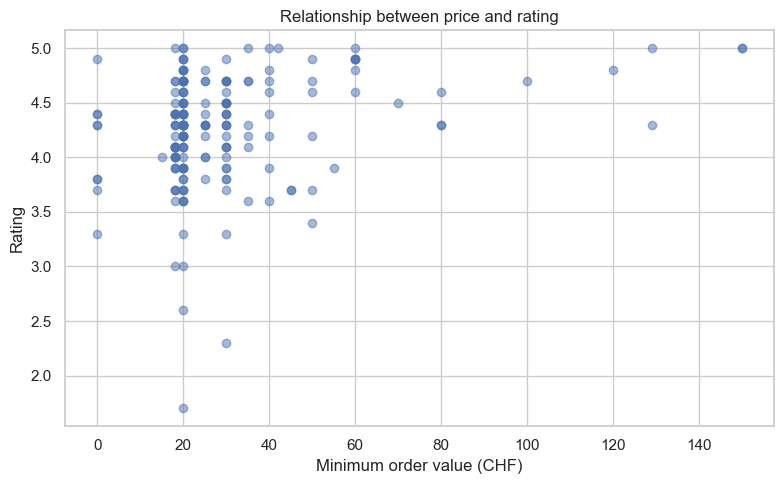

In [18]:
plt.figure(figsize=(8, 5))
plt.scatter(
    df["minimum_clean"],
    df["rating"],
    alpha=0.5
)

plt.xlabel("Minimum order value (CHF)")
plt.ylabel("Rating")
plt.title("Relationship between price and rating")
plt.tight_layout()

plt.savefig("outputs/figures/scatter_price_rating.png")
plt.show()


# Geographical Scope and Visualization

Zurich represents the geographical scope of the study.  
The geographical visualization is used to provide spatial context for the dataset and is not intended to analyse or represent the exact locations of individual restaurants.

As the dataset does not contain address-level or coordinate information, a detailed location-based analysis is not feasible.  
Instead, the city of Zurich is visualized as the spatial frame of reference for the analysis in order to clearly communicate the geographical boundaries of the study.


In [19]:
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle


In [20]:
!pip install folium


In [22]:
# ============================================================
# Geographical Scope Visualization
# City of Zurich (study area) + Canton of Zurich (context)
# ============================================================

import folium
import os

# ------------------------------------------------------------
# Output directory
# ------------------------------------------------------------
os.makedirs("outputs/maps", exist_ok=True)

# ------------------------------------------------------------
# Map center (Zurich city center)
# ------------------------------------------------------------
zurich_center = (47.3769, 8.5417)

# ------------------------------------------------------------
# Bounding box: City of Zurich (approximate, visualization only)
# ------------------------------------------------------------
city_min_lon, city_min_lat = 8.45, 47.32
city_max_lon, city_max_lat = 8.65, 47.45

# ------------------------------------------------------------
# Bounding box: Canton of Zurich (approximate, context)
# ------------------------------------------------------------
canton_min_lon, canton_min_lat = 8.30, 47.20
canton_max_lon, canton_max_lat = 8.90, 47.70

# ------------------------------------------------------------
# Create base map
# ------------------------------------------------------------
m = folium.Map(
    location=zurich_center,
    zoom_start=11,
    tiles="OpenStreetMap"
)

# ------------------------------------------------------------
# City center marker
# ------------------------------------------------------------
folium.Marker(
    location=zurich_center,
    popup="Zurich – Study Area",
    icon=folium.Icon(color="blue", icon="info-sign")
).add_to(m)

# ------------------------------------------------------------
# City Zurich boundary (study area)
# ------------------------------------------------------------
folium.Rectangle(
    bounds=[
        (city_min_lat, city_min_lon),
        (city_max_lat, city_max_lon)
    ],
    color="red",
    weight=3,
    fill=True,
    fill_opacity=0.15,
    tooltip="City of Zurich (study area)"
).add_to(m)

# ------------------------------------------------------------
# Save map
# ------------------------------------------------------------
output_path = "outputs/maps/zurich_scope_map.html"
m.save(output_path)

output_path


'outputs/maps/zurich_scope_map.html'